In [28]:
# getting mocap data
from support.funcs import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_mocap,starttime=read_df_csv(r'C:\Users\arpan\OneDrive\Documents\internship\mocapcsv\arpan_t2.csv')

# converting to epoch time
epoch_time = starttime.timestamp() 
time=df_mocap['seconds'].to_numpy()
time=time+epoch_time
df_mocap.insert(1,'epoch_time',time)
df_mocap.columns

# getting mpipe data
df_mpipe=pd.read_csv('mpipe.csv')
df_mpipe

# converting mpipe to mocap frame
rotmat=[]
org=[]
with open(r'D435_rotmat.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        line=x.split(' ')
        while ' ' in line:
            line=line.remove(' ')
        while '' in line:
            ind=line.index('')
            line.pop(ind)
        x=[]
        for i in line:
            x.append(float(i))
        rotmat.append(x)
    rotmat=np.array(rotmat)

with open(r'D435_org.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        org.append([float(x)])
    k_org=np.array(org)

for index,j in df_mpipe.iterrows():
    for k in range(1,1+7*3,3):
        point=[]
        for p in range(k,k+3):
            point.append(j[p])
        converted_point=frame_con(point,rotmat,org)
        for o in range(3):
            df_mpipe.iloc[index,k+o]=converted_point[o]

# occlusion based on limb length
df_limb=pd.read_csv('limbl.csv')
olu,oll,oru,orl,oss=[0],[0],[0],[0],[0]
th=0.10 # 10cm
for i in range(1,len(df_limb)):
    if abs(df_limb['lu'][i]-df_limb['lu'].mean())>th:
        olu.append(1)
    else:
        olu.append(0)
    if abs(df_limb['ll'][i]-df_limb['ll'].mean())>th:
        oll.append(1)
    else:
        oll.append(0)
    if abs(df_limb['ru'][i]-df_limb['ru'].mean())>th:
        oru.append(1)
    else:
        oru.append(0)
    if abs(df_limb['rl'][i]-df_limb['rl'].mean())>th:
        orl.append(1)
    else:
        orl.append(0)
    if abs(df_limb['ss'][i]-df_limb['ss'].mean())>th:
        oss.append(1)
    else:
        oss.append(0)

# filtering occlusion limb length
for index,j in df_mpipe.iterrows():
    
    for k in range(3):
        if oss[index]==0 and olu[index]==0:
            lsx=df_mpipe['ls_x'].iloc[index]
            lsy=df_mpipe['ls_y'].iloc[index]
            lsz=df_mpipe['ls_z'].iloc[index]
        df_mpipe['ls_x'].iloc[index]=lsx
        df_mpipe['ls_y'].iloc[index]=lsy
        df_mpipe['ls_z'].iloc[index]=lsz
        
    for k in range(3):
        if oll[index]==0 and olu[index]==0:
            lex=df_mpipe['le_x'].iloc[index]
            ley=df_mpipe['le_y'].iloc[index]
            lez=df_mpipe['le_z'].iloc[index]
        df_mpipe['le_x'].iloc[index]=lex
        df_mpipe['le_y'].iloc[index]=ley
        df_mpipe['le_z'].iloc[index]=lez

    for k in range(3):
        if oll[index]==0:
            lwx=df_mpipe['lw_x'].iloc[index]
            lwy=df_mpipe['lw_y'].iloc[index]
            lwz=df_mpipe['lw_z'].iloc[index]
        df_mpipe['lw_x'].iloc[index]=lwx
        df_mpipe['lw_y'].iloc[index]=lwy
        df_mpipe['lw_z'].iloc[index]=lwz

    for k in range(3):
        if oss[index]==0 and oru[index]==0:
            rsx=df_mpipe['rs_x'].iloc[index]
            rsy=df_mpipe['rs_y'].iloc[index]
            rsz=df_mpipe['rs_z'].iloc[index]
        df_mpipe['rs_x'].iloc[index]=rsx
        df_mpipe['rs_y'].iloc[index]=rsy
        df_mpipe['rs_z'].iloc[index]=rsz

    for k in range(3):
        if orl[index]==0 and oru[index]==0:
            rex=df_mpipe['re_x'].iloc[index]
            rey=df_mpipe['re_y'].iloc[index]
            rez=df_mpipe['re_z'].iloc[index]
        df_mpipe['re_x'].iloc[index]=rex
        df_mpipe['re_y'].iloc[index]=rey
        df_mpipe['re_z'].iloc[index]=rez

    for k in range(3):
        if orl[index]==0 and oru[index]==0:
            rwx=df_mpipe['rw_x'].iloc[index]
            rwy=df_mpipe['rw_y'].iloc[index]
            rwz=df_mpipe['rw_z'].iloc[index]
        df_mpipe['rw_x'].iloc[index]=rwx
        df_mpipe['rw_y'].iloc[index]=rwy
        df_mpipe['rw_z'].iloc[index]=rwz

def pvt(x,t,ylabel='Angle (degrees)'):
    from scipy.signal import savgol_filter
    y=[]
    for i in x:
        y.append(i)
    w = savgol_filter(y,  int(len(y)/20),3)
    plt.plot(t,w)
    plt.ylabel(ylabel)
    plt.xlabel('time(s)')    

In [29]:
# Finding the calibration frame
f = False
for ind, val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i, v in enumerate(df_mocap['epoch_time'].tolist()):
        if v == val:
            print(ind, i, val)
            mpipe_cf = ind
            mocap_cf = i
            f = True
            break
    if f:
        break

# If no matching calibration frame is found, set default calibration frames
if not f:
    mpipe_cf = 20
    mocap_cf = 20

print('\n-----------------------\n')

# Printing additional matches if available
for ind, val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i, v in enumerate(df_mocap['epoch_time'].tolist()):
        if v == val:
            print(ind, i, val)


80 96 1685772953.843

-----------------------

80 96 1685772953.843
83 116 1685772954.043
92 176 1685772954.643
95 196 1685772954.843
98 216 1685772955.043
150 563 1685772958.513
159 623 1685772959.113
223 1050 1685772963.383
226 1070 1685772963.583
229 1090 1685772963.783
290 1497 1685772967.853
293 1517 1685772968.053
305 1597 1685772968.853
354 1924 1685772972.123
357 1944 1685772972.323
360 1964 1685772972.523
369 2024 1685772973.123
372 2044 1685772973.323
375 2064 1685772973.523
433 2451 1685772977.393
436 2471 1685772977.593
439 2491 1685772977.793


In [30]:
# calibrate the frame shoulder frame of reference

# Calculating the Right Shoulder refernece frame from mpipe data
mpiperrf=find_orthogonal_frame([df_mpipe['re_x'][mpipe_cf]-df_mpipe['rs_x'][mpipe_cf],df_mpipe['re_y'][mpipe_cf]-df_mpipe['rs_y'][mpipe_cf],df_mpipe['re_z'][mpipe_cf]-df_mpipe['rs_z'][mpipe_cf]],
                               [df_mpipe['rw_x'][mpipe_cf]-df_mpipe['re_x'][mpipe_cf],df_mpipe['rw_y'][mpipe_cf]-df_mpipe['re_y'][mpipe_cf],df_mpipe['rw_z'][mpipe_cf]-df_mpipe['re_z'][mpipe_cf]])

# Calculating the Left Shoulder refernece frame from mpipe data
mpipelrf=find_orthogonal_frame([df_mpipe['le_x'][mpipe_cf]-df_mpipe['ls_x'][mpipe_cf],df_mpipe['le_y'][mpipe_cf]-df_mpipe['ls_y'][mpipe_cf],df_mpipe['le_z'][mpipe_cf]-df_mpipe['ls_z'][mpipe_cf]],
                               [df_mpipe['lw_x'][mpipe_cf]-df_mpipe['le_x'][mpipe_cf],df_mpipe['lw_y'][mpipe_cf]-df_mpipe['le_y'][mpipe_cf],df_mpipe['lw_z'][mpipe_cf]-df_mpipe['le_z'][mpipe_cf]])

# Calculating the trunk refernece frame from mpipe data
mpipetrf=find_tr_frame([df_mpipe['rs_x'][mpipe_cf],df_mpipe['rs_y'][mpipe_cf],df_mpipe['rs_z'][mpipe_cf]],
                       [df_mpipe['ls_x'][mpipe_cf],df_mpipe['ls_y'][mpipe_cf],df_mpipe['ls_z'][mpipe_cf]],
                       [df_mpipe['tr_x'][mpipe_cf],df_mpipe['tr_y'][mpipe_cf],df_mpipe['tr_z'][mpipe_cf]])

# Calculating the Right Shoulder reference frame from mocap data
mocaprrf=find_orthogonal_frame([df_mocap['re_x'][mocap_cf]-df_mocap['rs_x'][mocap_cf],df_mocap['re_y'][mocap_cf]-df_mocap['rs_y'][mocap_cf],df_mocap['re_z'][mocap_cf]-df_mocap['rs_z'][mocap_cf]],
                               [df_mocap['rw_x'][mocap_cf]-df_mocap['re_x'][mocap_cf],df_mocap['rw_y'][mocap_cf]-df_mocap['re_y'][mocap_cf],df_mocap['rw_z'][mocap_cf]-df_mocap['re_z'][mocap_cf]])

# Calculating the Left Shoulder refernece frame from mocap data
mocaplrf=find_orthogonal_frame([df_mocap['le_x'][mocap_cf]-df_mocap['ls_x'][mocap_cf],df_mocap['le_y'][mocap_cf]-df_mocap['ls_y'][mocap_cf],df_mocap['le_z'][mocap_cf]-df_mocap['ls_z'][mocap_cf]],
                               [df_mocap['lw_x'][mocap_cf]-df_mocap['le_x'][mocap_cf],df_mocap['lw_y'][mocap_cf]-df_mocap['le_y'][mocap_cf],df_mocap['lw_z'][mocap_cf]-df_mocap['le_z'][mocap_cf]])

# Calculating the trunk refernece frame from mocap data
mocaptrf=find_tr_frame([df_mocap['rs_x'][mocap_cf],df_mocap['rs_y'][mocap_cf],df_mocap['rs_z'][mocap_cf]],
                       [df_mocap['ls_x'][mocap_cf],df_mocap['ls_y'][mocap_cf],df_mocap['ls_z'][mocap_cf]],
                       [df_mocap['tr_x'][mocap_cf],df_mocap['tr_y'][mocap_cf],df_mocap['tr_z'][mocap_cf]])

In [31]:
# Calculating Euler angles for trunk movements

# Initializing lists to store the Euler angles for mpipe data
mpipettheta1, mpipettheta2, mpipettheta3 = [], [], []

# Looping over the data points in mpipe
for i in range(len(df_mpipe['epoch_time'].tolist())):
    # Calculating the transformation matrix for the current frame of mpipe data
    newmat = find_tr_frame(
        [df_mpipe['rs_x'][i], df_mpipe['rs_y'][i], df_mpipe['rs_z'][i]],
        [df_mpipe['ls_x'][i], df_mpipe['ls_y'][i], df_mpipe['ls_z'][i]],
        [df_mpipe['tr_x'][i], df_mpipe['tr_y'][i], df_mpipe['tr_z'][i]]
    )

    # Calculating the rotation matrix between mpipetrf and the new frame
    rotmat = find_rotation_matrix(mpipetrf, newmat)
    
    # Calculating the rotation angles from the rotation matrix
    mpiperthetas = rotation_angles(rotmat)

    # Appending the Euler angles to the respective lists
    mpipettheta1.append(mpiperthetas[0])
    mpipettheta2.append(mpiperthetas[1])
    mpipettheta3.append(-mpiperthetas[2])

# Initializing lists to store the Euler angles for mocap data
mocapttheta1, mocapttheta2, mocapttheta3 = [], [], []

# Looping over the data points in mocap
for i in range(len(df_mocap['epoch_time'].tolist())):
    # Calculating the transformation matrix for the current frame of mocap data
    newmat = find_tr_frame(
        [df_mocap['rs_x'][i], df_mocap['rs_y'][i], df_mocap['rs_z'][i]],
        [df_mocap['ls_x'][i], df_mocap['ls_y'][i], df_mocap['ls_z'][i]],
        [df_mocap['tr_x'][i], df_mocap['tr_y'][i], df_mocap['tr_z'][i]]
    )

    # Calculating the rotation matrix between mocaptrf and the new frame
    rotmat = find_rotation_matrix(mocaptrf, newmat)
    
    # Calculating the rotation angles from the rotation matrix
    mocaprthetas = rotation_angles(rotmat)

    # Appending the Euler angles to the respective lists
    mocapttheta1.append(mocaprthetas[0])
    mocapttheta2.append(mocaprthetas[1])
    mocapttheta3.append(-mocaprthetas[2])

 #Note: The - sign is added to mpiperthetas[2] and mocaprthetas[2] to indicate the reversal of the rotation direction for the third Euler angle


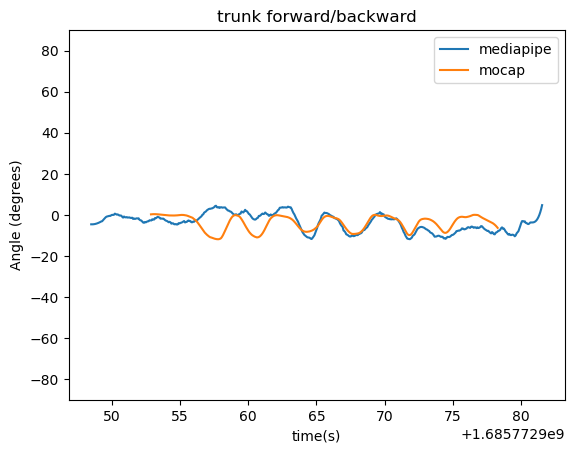

RMSE of forward/backward:  5.261122832033761


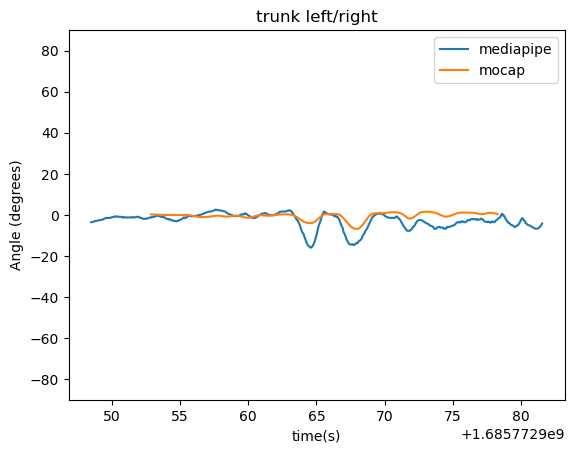

RMSE of left/right:  4.070231965788335


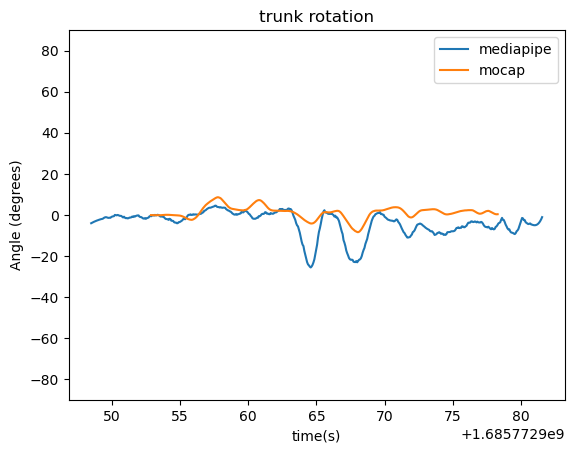

RMSE of rotation:  7.540254208749186


In [32]:
# plotting the trunk angles
pvt(mpipettheta1,df_mpipe['epoch_time'])
pvt(mocapttheta1,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('trunk forward/backward')
plt.ylim(-90,90)
plt.show()

print('RMSE of forward/backward: ',RMSE(mocapttheta1,mpipettheta1,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipettheta2,df_mpipe['epoch_time'])
pvt(mocapttheta2,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('trunk left/right')
plt.ylim(-90,90)
plt.show()

print('RMSE of left/right: ',RMSE(mocapttheta2,mpipettheta2,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipettheta3,df_mpipe['epoch_time'].tolist())
pvt(mocapttheta3,df_mocap['epoch_time'].tolist())
plt.legend(['mediapipe','mocap'])
plt.title('trunk rotation')
plt.ylim(-90,90)
plt.show()

print('RMSE of rotation: ',RMSE(mocapttheta3,mpipettheta3,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


In [33]:
# Calculating the elbow angle using mediapipe and mocap data
mpipeRightElbowAngle, mocapRightElbowAngle = [], []

# Calculate right elbow angle using mediapipe data
for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRightElbowAngle.append(angle3point([df_mpipe['rs_x'][i], df_mpipe['rs_y'][i], df_mpipe['rs_z'][i]],
                                            [df_mpipe['re_x'][i], df_mpipe['re_y'][i], df_mpipe['re_z'][i]],
                                            [df_mpipe['rw_x'][i], df_mpipe['rw_y'][i], df_mpipe['rw_z'][i]]))

# Calculate right elbow angle using mocap data
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapRightElbowAngle.append(angle3point([df_mocap['rs_x'][i], df_mocap['rs_y'][i], df_mocap['rs_z'][i]],
                                            [df_mocap['re_x'][i], df_mocap['re_y'][i], df_mocap['re_z'][i]],
                                            [df_mocap['rw_x'][i], df_mocap['rw_y'][i], df_mocap['rw_z'][i]]))

mpipeLeftElbowAngle, mocapLeftElbowAngle = [], []

# Calculate left elbow angle using mediapipe data
for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLeftElbowAngle.append(angle3point([df_mpipe['ls_x'][i], df_mpipe['ls_y'][i], df_mpipe['ls_z'][i]],
                                           [df_mpipe['le_x'][i], df_mpipe['le_y'][i], df_mpipe['le_z'][i]],
                                           [df_mpipe['lw_x'][i], df_mpipe['lw_y'][i], df_mpipe['lw_z'][i]]))

# Calculate left elbow angle using mocap data
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapLeftElbowAngle.append(angle3point([df_mocap['ls_x'][i], df_mocap['ls_y'][i], df_mocap['ls_z'][i]],
                                           [df_mocap['le_x'][i], df_mocap['le_y'][i], df_mocap['le_z'][i]],
                                           [df_mocap['lw_x'][i], df_mocap['lw_y'][i], df_mocap['lw_z'][i]]))

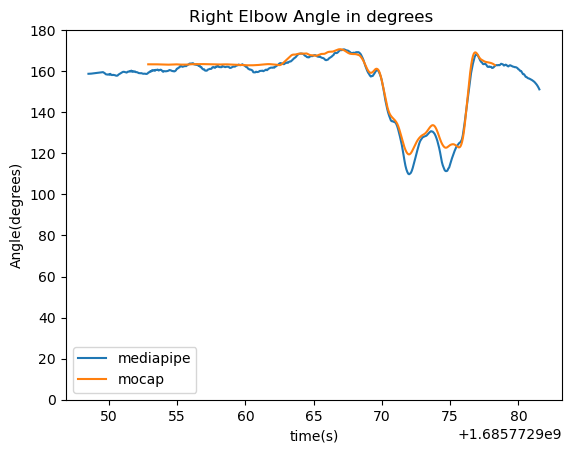

RMSE of Right Elbow Angle: 3.173865910903033


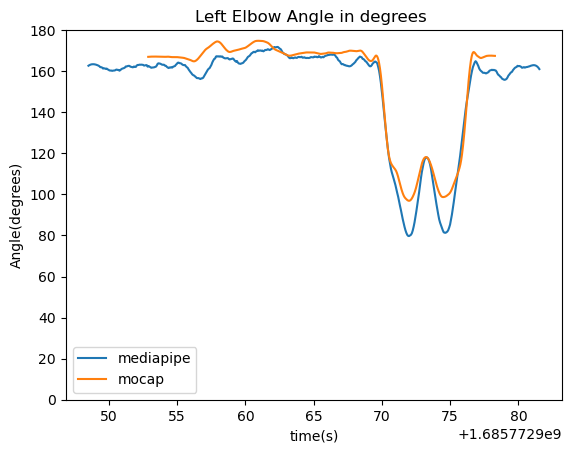

RMSE of Left Elbow Angle: 6.8593285757899505


In [34]:
#test graph right elbow angle 
pvt(mpipeRightElbowAngle,df_mpipe['epoch_time'])
pvt(mocapRightElbowAngle,df_mocap['epoch_time'])
plt.title('Right Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

print('RMSE of Right Elbow Angle:',RMSE(mocapRightElbowAngle,mpipeRightElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

#test graph left elbow angle 
pvt(mpipeLeftElbowAngle,df_mpipe['epoch_time'])
pvt(mocapLeftElbowAngle,df_mocap['epoch_time'])
plt.title('Left Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()


print('RMSE of Left Elbow Angle:',RMSE(mocapLeftElbowAngle,mpipeLeftElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

In [35]:
# Calculating Euler angles for shoulder movements

# Initializing lists to store the Euler angles for the right shoulder in mpipe data
mpipertheta1, mpipertheta2, mpipertheta3 = [], [], []

# Initializing lists to store the Euler angles for the left shoulder in mpipe data
mpipeltheta1, mpipeltheta2, mpipeltheta3 = [], [], []

# Threshold angle for elbow flexion
eath = 160

# Looping over the data points in mpipe
for i in range(len(df_mpipe['epoch_time'].tolist())):
    # Calculating the transformation matrix for the right shoulder of mpipe
    newmat = find_orthogonal_frame(
        [df_mpipe['re_x'][i] - df_mpipe['rs_x'][i], df_mpipe['re_y'][i] - df_mpipe['rs_y'][i], df_mpipe['re_z'][i] - df_mpipe['rs_z'][i]],
        [df_mpipe['rw_x'][i] - df_mpipe['re_x'][i], df_mpipe['rw_y'][i] - df_mpipe['re_y'][i], df_mpipe['rw_z'][i] - df_mpipe['re_z'][i]]
    )
    rotmat = find_rotation_matrix(mpiperrf, newmat)
    mpiperthetas = rotation_angles(rotmat)

    # Calculating the transformation matrix for the left shoulder of mpipe
    newmat = find_orthogonal_frame(
        [df_mpipe['le_x'][i] - df_mpipe['ls_x'][i], df_mpipe['le_y'][i] - df_mpipe['ls_y'][i], df_mpipe['le_z'][i] - df_mpipe['ls_z'][i]],
        [df_mpipe['lw_x'][i] - df_mpipe['le_x'][i], df_mpipe['lw_y'][i] - df_mpipe['le_y'][i], df_mpipe['lw_z'][i] - df_mpipe['le_z'][i]]
    )
    rotmat = find_rotation_matrix(mpipelrf, newmat)
    mpipelthetas = rotation_angles(rotmat)

    # Appending the Euler angles to the respective lists for the right shoulder
    mpipertheta1.append(mpiperthetas[0])
    mpipertheta2.append(mpiperthetas[1])
    if mpipeRightElbowAngle[i] < eath:
        mpipertheta3.append(-mpiperthetas[2])
    else:
        mpipertheta3.append(np.nan)

    # Appending the Euler angles to the respective lists for the left shoulder
    mpipeltheta1.append(mpipelthetas[0])
    mpipeltheta2.append(-mpipelthetas[1])
    if mpipeLeftElbowAngle[i] < eath:
        mpipeltheta3.append(mpipelthetas[2])
    else:
        mpipeltheta3.append(np.nan)

# Initializing lists to store the Euler angles for the right shoulder in mocap data
mocaprtheta1, mocaprtheta2, mocaprtheta3 = [], [], []

# Initializing lists to store the Euler angles for the left shoulder in mocap data
mocapltheta1, mocapltheta2, mocapltheta3 = [], [], []

# Threshold angle for elbow flexion
eath = 160

# Looping over the data points in mocap
for i in range(len(df_mocap['epoch_time'].tolist())):
    # Calculating the transformation matrix for the right shoulder of mocap
    newmat = find_orthogonal_frame(
        [df_mocap['re_x'][i] - df_mocap['rs_x'][i], df_mocap['re_y'][i] - df_mocap['rs_y'][i], df_mocap['re_z'][i] - df_mocap['rs_z'][i]],
        [df_mocap['rw_x'][i] - df_mocap['re_x'][i], df_mocap['rw_y'][i] - df_mocap['re_y'][i], df_mocap['rw_z'][i] - df_mocap['re_z'][i]]
    )
    rotmat = find_rotation_matrix(mocaprrf, newmat)
    mocaprthetas = rotation_angles(rotmat)

    # Calculating the transformation matrix for the left shoulder of mocap
    newmat = find_orthogonal_frame(
        [df_mocap['le_x'][i] - df_mocap['ls_x'][i], df_mocap['le_y'][i] - df_mocap['ls_y'][i], df_mocap['le_z'][i] - df_mocap['ls_z'][i]],
        [df_mocap['lw_x'][i] - df_mocap['le_x'][i], df_mocap['lw_y'][i] - df_mocap['le_y'][i], df_mocap['lw_z'][i] - df_mocap['le_z'][i]]
    )
    rotmat = find_rotation_matrix(mocaplrf, newmat)
    mocaplthetas = rotation_angles(rotmat)

    # Appending the Euler angles to the respective lists for the right shoulder
    mocaprtheta1.append(mocaprthetas[0])
    mocaprtheta2.append(mocaprthetas[1])
    if mocapRightElbowAngle[i] < eath:
        mocaprtheta3.append(-mocaprthetas[2])
    else:
        mocaprtheta3.append(np.nan)

    # Appending the Euler angles to the respective lists for the left shoulder
    mocapltheta1.append(mocaplthetas[0])
    mocapltheta2.append(-mocaplthetas[1])
    if mocapLeftElbowAngle[i] < eath:
        mocapltheta3.append(mocaplthetas[2])
    else:
        mocapltheta3.append(np.nan)   

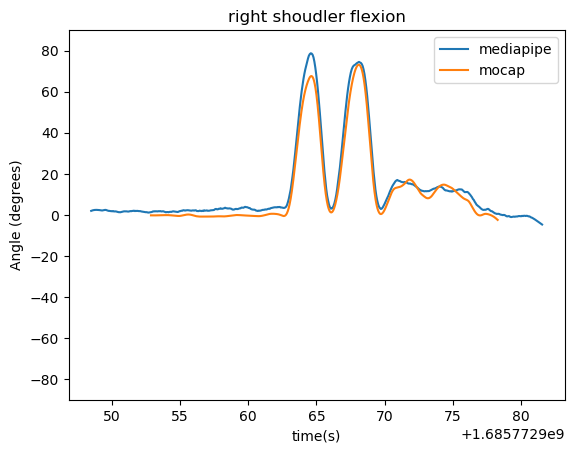

RMSE of flexion/extension:  4.350509091363133


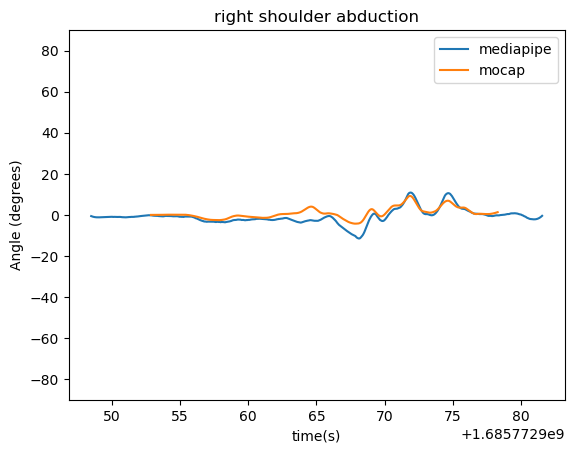

RMSE of abduct/adduct:  2.693560464705105


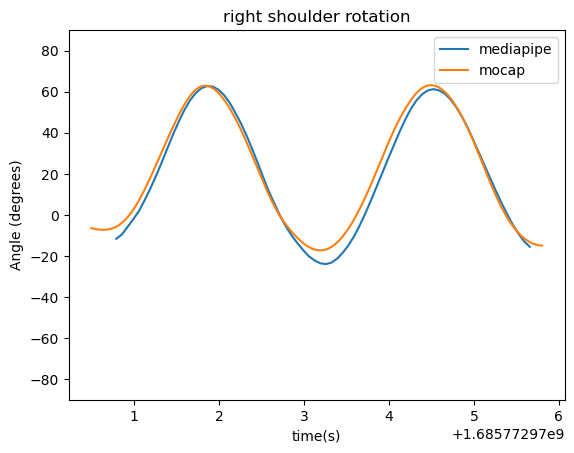

RMSE of internal/external rotation:  5.165736650678954


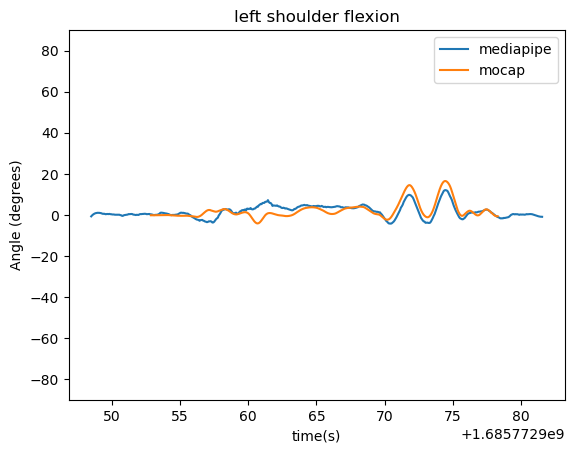

RMSE of flexion/extension:  3.0353945092598464


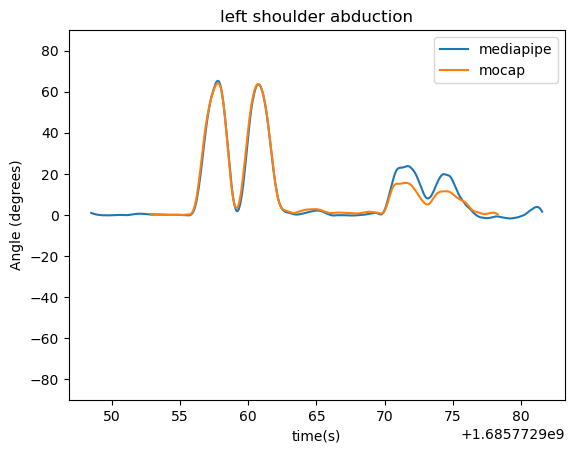

RMSE of abduct/adduct:  3.0402230253345937


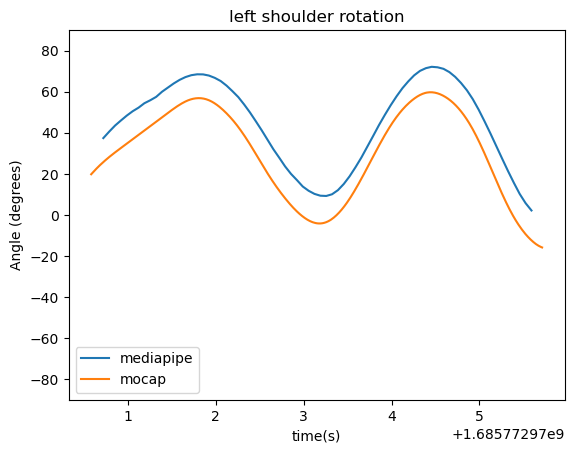

RMSE of internal/external rotation:  12.36231727193041


In [36]:
# Plotting the shoulder angles
pvt(mpipertheta1,df_mpipe['epoch_time'])
pvt(mocaprtheta1,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right shoudler flexion')
plt.ylim(-90,90)
plt.show()

print('RMSE of flexion/extension: ',RMSE(mocaprtheta1,mpipertheta1,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipertheta2,df_mpipe['epoch_time'])
pvt(mocaprtheta2,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right shoulder abduction')
plt.ylim(-90,90)
plt.show()

print('RMSE of abduct/adduct: ',RMSE(mocaprtheta2,mpipertheta2,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipertheta3,df_mpipe['epoch_time'].tolist())
pvt(mocaprtheta3,df_mocap['epoch_time'].tolist())
plt.legend(['mediapipe','mocap'])
plt.title('right shoulder rotation')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal/external rotation: ',RMSE(mocaprtheta3,mpipertheta3,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta1,df_mpipe['epoch_time'])
pvt(mocapltheta1,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder flexion')
plt.ylim(-90,90)
plt.show()

print('RMSE of flexion/extension: ',RMSE(mocapltheta1,mpipeltheta1,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta2,df_mpipe['epoch_time'])
pvt(mocapltheta2,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder abduction')
plt.ylim(-90,90)
plt.show()

print('RMSE of abduct/adduct: ',RMSE(mocapltheta2,mpipeltheta2,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta3,df_mpipe['epoch_time'].tolist())
pvt(mocapltheta3,df_mocap['epoch_time'].tolist())
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder rotation')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal/external rotation: ',RMSE(mocapltheta3,mpipeltheta3,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))